# Zillow Dataset

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats
from math import sqrt

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Acquire and Prepare files
import acquire
import prepare

# Prep
from sklearn.model_selection import train_test_split

In [2]:
df = acquire.zillow_data_query()

In [3]:
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,0,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,1,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,2,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,NaN,...,3,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,NaN,...,4,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None


#### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Does logerror vary across counties?
- Is there a correlation between bedroom and bathroom count?
- Is there a correlation between taxamount and logerror?
- Which variable has the highest logerror?
- Does logeerror effect selling price?

#### 2. Answer those questions through a mix of statistical tests and visualizations.

In your exploration, be sure you include the following:

- a plot with at least 3 dimensions, such as x, y, and color.

- at least 3 different types of plots (like box, scatter, bar, ...)

- at least 2 statistical tests.

- document takeaways/conclusions after each question is addressed.

In [4]:
train_validate, test = train_test_split(df, test_size=.30, random_state=123)
train, validate = train_test_split(train_validate, test_size=.20, random_state=123)

### Plots

In [5]:
def county_name(county):
    if county == 6037:
        return 'Los Angeles'
    elif county == 6059:
        return 'Orange'
    elif county == 6111:
        return 'Ventura'

train['county'] = train.fips.apply(county_name)

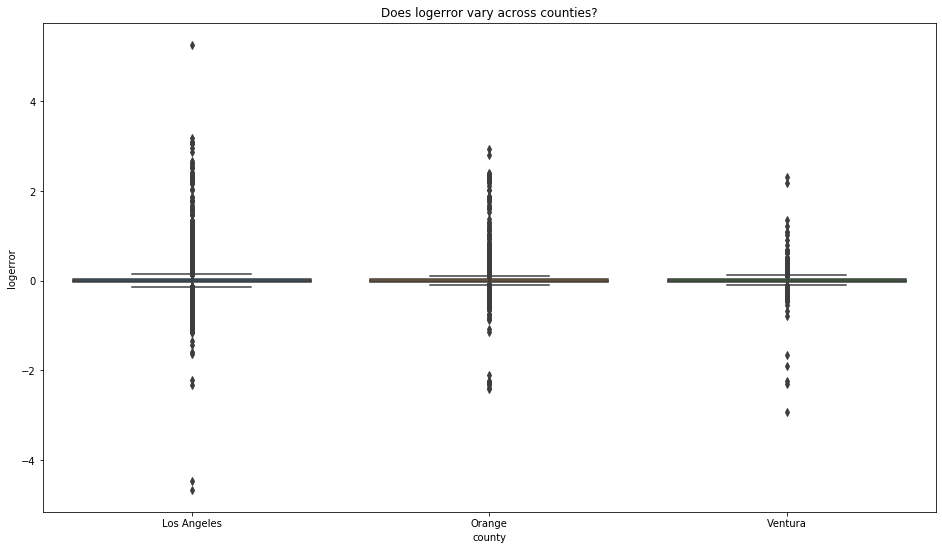

In [6]:
# Boxplot
plt.figure(figsize=(16, 9))
sns.boxplot(data = train, x='county', y='logerror')
plt.title('Does logerror vary across counties?')
plt.show()

<b>Takeaways:</b>
- Not much variation is seen
- Los Angeles has the most outliers 

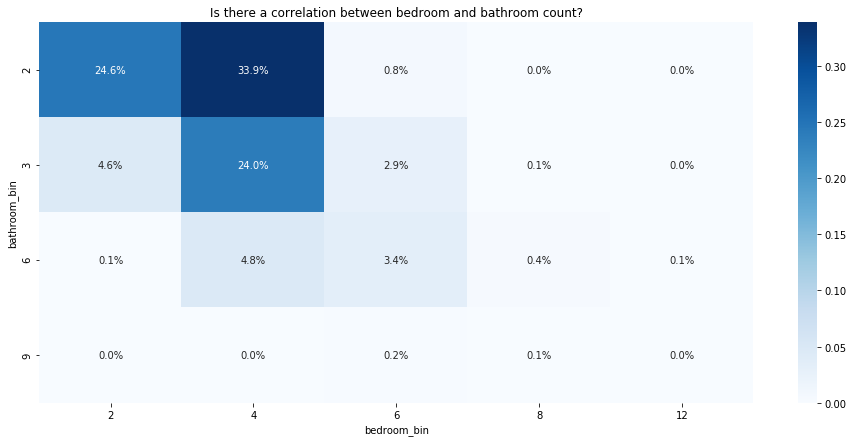

In [7]:
# Heatmap 
train['bathroom_bin'] = pd.cut(train.bathroomcnt, bins=[0, 2, 3, 6, 9], labels=['2', '3', '6', '9'])
train['bedroom_bin'] = pd.cut(train.bedroomcnt, bins=[0, 2, 4, 6, 8, 12], labels=['2', '4', '6', '8', '12'])

plt.figure(figsize=(16,7))
ctab = pd.crosstab(train.bathroom_bin, train.bedroom_bin, normalize=True)
sns.heatmap(ctab, cmap='Blues', annot=True, fmt='.1%')
plt.title('Is there a correlation between bedroom and bathroom count?')
plt.show()

<b>Takeaways:</b>
- Most 4 bedroom homes have 2 bathrooms
- Zero percent home with 12 bedrooms have 2-3 bathrooms

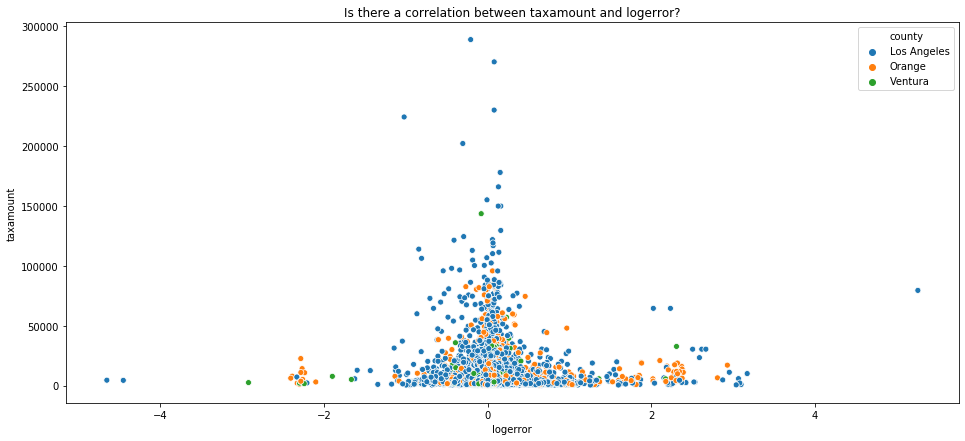

In [8]:
# Scatterplot

plt.figure(figsize=(16,7))
sns.scatterplot(data=train, x='logerror', y='taxamount', hue='county')
plt.title('Is there a correlation between taxamount and logerror?')
plt.show()

<b>Takeaways:</b>
- There seems to be a normal distribution between taxamount and logerror